In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
np.random.seed(0)

In [3]:
df = sns.load_dataset('iris')

In [4]:
# Removing setosa since it is somewhat separated already
df = df[df['species'] != 'setosa']

In [11]:
df.tail(20)

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,virginica
131,7.9,3.8,6.4,2.0,virginica
132,6.4,2.8,5.6,2.2,virginica
133,6.3,2.8,5.1,1.5,virginica
134,6.1,2.6,5.6,1.4,virginica
135,7.7,3.0,6.1,2.3,virginica
136,6.3,3.4,5.6,2.4,virginica
137,6.4,3.1,5.5,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica
139,6.9,3.1,5.4,2.1,virginica


In [15]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [12]:
species_dict = {'versicolor':0, 'virginica':1}

In [17]:
df['species'] = df['species'].map(lambda x: species_dict[x])

In [19]:
X = df[['petal_length', 'petal_width']]

In [20]:
X.head()

,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


In [21]:
y = df['species']

In [49]:
kpca = KernelPCA(kernel='rbf',
                n_components=2)

X_kpca = kpca.fit_transform(X)

In [140]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

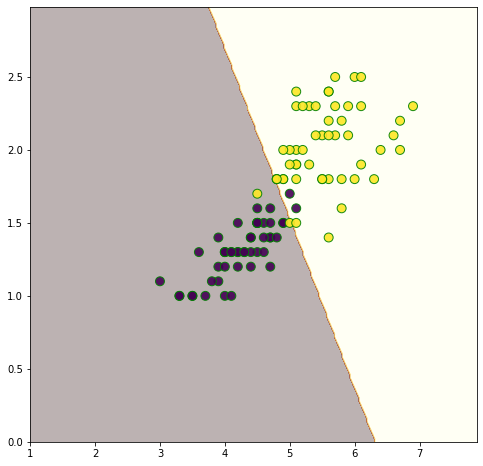

In [144]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

fig = plt.figure(figsize=(8, 8))
ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3)

plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g')


In [145]:
# Now with Kernel PCA:

clf = LogisticRegression(solver='lbfgs')
clf.fit(X_kpca, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
Xv = X_kpca.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min() - .5, Xv.max() + .5
y_min, y_max = y.min() - .5, y.max() 

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

(-0.5, 1)

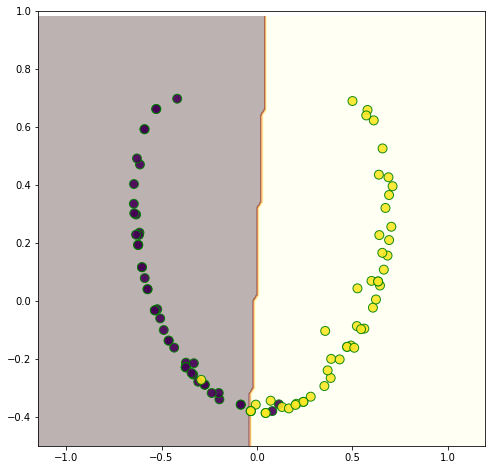

In [148]:

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

fig = plt.figure(figsize=(8, 8))
ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3);

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, s=80, alpha=0.9, edgecolors='g');
plt.ylim(-.5, 1)
